In [1]:
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from PIL import Image
import os


In [2]:
path = '/home/crimsondawn/602_project/data/brain'

patient_folders = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
print(patient_folders)

['1BC037', '1BA220', '1BB062', '1BC070', '1BA012', '1BC077', '1BB002', '1BC052', '1BA111', '1BB043', '1BA091', '1BC023', '1BA116', '1BA359', '1BB200', '1BA278', '1BB041', '1BB016', '1BC062', '1BB109', '1BB039', '1BC006', '1BB072', '1BB171', '1BC047', '1BB028', '1BB098', '1BC008', '1BC083', '1BB008', '1BB102', '1BB090', '1BB184', '1BB026', '1BC087', '1BA345', '1BC022', '1BA189', '1BA222', '1BB096', '1BB075', '1BC020', '1BA184', '1BB179', '1BC038', '1BB073', '1BC058', '1BC027', '1BA058', '1BB005', '1BA001', '1BA185', '1BC075', '1BB049', '1BC031', '1BB034', '1BA328', '1BC014', '1BC048', '1BB100', '1BA307', '1BB151', '1BB017', '1BA206', '1BC073', '1BC001', '1BA158', '1BB050', '1BB011', '1BA076', '1BA075', '1BC009', '1BC017', '1BA151', '1BC046', '1BC094', '1BA100', '1BA288', '1BA105', '1BB189', '1BC039', '1BB033', '1BA014', '1BA305', '1BB175', '1BC074', '1BC007', '1BC035', '1BC076', '1BB091', '1BB111', '1BB048', '1BC084', '1BA336', '1BB145', '1BA141', '1BC028', '1BA143', '1BB082', '1BA294',

In [7]:
def calculate_mid_and_list(num1, num2):
  # Calculate the mid value
  mid_value = (num1 + num2) / 2
  before_list = [int(mid_value - i) for i in range(1, 76, 2)]
  after_list = [int(mid_value + i) for i in range(1, 76, 2)]
  return before_list + [int(mid_value)] + after_list

# Example usage
num1 = 0
num2 = 218

result = calculate_mid_and_list(num1, num2)



In [9]:
print(len(result))

77


In [39]:
# temp_path = "/home/crimsondawn/602_project/data/brain/1BB062/mr.nii.gz"
# nii = nib.load(temp_path)
# nii_data = nii.get_fdata()
# for i in result:
#     transversal_slice = nii_data[:, :, i]
#     print(nii_data.shape[2])
#     plt.imshow(ndi.rotate(transversal_slice, 90), cmap='bone')
#     plt.axis('off')
#     plt.show()

In [ ]:
# transversal_slice = nii_data[i, :, :]


In [42]:
from tqdm import tqdm

input_path = "/home/crimsondawn/602_project/data/brain"
ct_output_path = "/home/crimsondawn/602_project/dataset_150/ct"
mask_output_path = "/home/crimsondawn/602_project/dataset_150/mask"
mri_output_path = "/home/crimsondawn/602_project/dataset_150/mr"

j = 0


for patient in tqdm(patient_folders):
    patient_path = os.path.join(input_path, patient)
    tags = ['ct', 'mask', 'mr']

    for tag in tags:
        nii_path = os.path.join(patient_path, tag + ".nii.gz")
        nii = nib.load(nii_path)
        nii_data = nii.get_fdata()
        if tag == 'ct':
            output_path = ct_output_path
        elif tag == 'mask':
            output_path = mask_output_path
        else:
            output_path = mri_output_path
            
        number_of_transversal_slices = calculate_mid_and_list(0, nii_data.shape[0])
        for i in number_of_transversal_slices:
            transversal_slice = nii_data[i, :, :]
            transversal_slice = ndi.rotate(transversal_slice, 90)
            transversal_output_path = os.path.join(output_path, f'{patient}_{i}_T.png')
            plt.imsave(transversal_output_path, transversal_slice, cmap='gray')

        number_of_saggital_slices = calculate_mid_and_list(0, nii_data.shape[1])
        for i in number_of_saggital_slices:
            sagittal_slice = nii_data[:, i, :]
            sagittal_slice = ndi.rotate(sagittal_slice, 90)
            sagittal_output_path = os.path.join(output_path, f'{patient}_{i}_S.png')
            plt.imsave(sagittal_output_path, sagittal_slice, cmap='gray')

        number_of_coronal_slices = calculate_mid_and_list(0, nii_data.shape[2])
        for i in number_of_coronal_slices:
            coronal_slice = nii_data[:, :, i]
            coronal_slice = ndi.rotate(coronal_slice, 90)
            coronal_output_path = os.path.join(output_path, f'{patient}_{i}_C.png')
            plt.imsave(coronal_output_path, coronal_slice, cmap='gray')
    j = j + 1
    
    tqdm.write(f'Processed patient {j}: {patient}')


  0%|          | 0/180 [00:00<?, ?it/s]

  1%|          | 1/180 [00:05<17:10,  5.76s/it]

Processed patient 1: 1BC037


  1%|          | 2/180 [00:11<16:31,  5.57s/it]

Processed patient 2: 1BA220


  2%|▏         | 3/180 [00:18<18:30,  6.28s/it]

Processed patient 3: 1BB062


  2%|▏         | 4/180 [00:24<18:32,  6.32s/it]

Processed patient 4: 1BC070


  3%|▎         | 5/180 [00:30<18:09,  6.23s/it]

Processed patient 5: 1BA012


  3%|▎         | 6/180 [00:37<18:32,  6.39s/it]

Processed patient 6: 1BC077


  4%|▍         | 7/180 [00:43<17:53,  6.21s/it]

Processed patient 7: 1BB002


  4%|▍         | 8/180 [00:49<17:36,  6.14s/it]

Processed patient 8: 1BC052


  5%|▌         | 9/180 [00:56<18:03,  6.34s/it]

Processed patient 9: 1BA111


  6%|▌         | 10/180 [01:02<17:39,  6.23s/it]

Processed patient 10: 1BB043


  6%|▌         | 11/180 [01:08<18:02,  6.41s/it]

Processed patient 11: 1BA091


  7%|▋         | 12/180 [01:14<17:35,  6.28s/it]

Processed patient 12: 1BC023


  7%|▋         | 13/180 [01:20<17:16,  6.21s/it]

Processed patient 13: 1BA116


  8%|▊         | 14/180 [01:26<16:37,  6.01s/it]

Processed patient 14: 1BA359


  8%|▊         | 15/180 [01:32<16:53,  6.14s/it]

Processed patient 15: 1BB200


  9%|▉         | 16/180 [01:38<16:39,  6.10s/it]

Processed patient 16: 1BA278


  9%|▉         | 17/180 [01:45<17:12,  6.33s/it]

Processed patient 17: 1BB041


 10%|█         | 18/180 [01:51<16:14,  6.02s/it]

Processed patient 18: 1BB016


 11%|█         | 19/180 [01:56<16:02,  5.98s/it]

Processed patient 19: 1BC062


 11%|█         | 20/180 [02:02<15:54,  5.96s/it]

Processed patient 20: 1BB109


 12%|█▏        | 21/180 [02:09<16:16,  6.14s/it]

Processed patient 21: 1BB039


 12%|█▏        | 22/180 [02:15<16:20,  6.20s/it]

Processed patient 22: 1BC006


 13%|█▎        | 23/180 [02:22<16:17,  6.23s/it]

Processed patient 23: 1BB072


 13%|█▎        | 24/180 [02:29<16:46,  6.45s/it]

Processed patient 24: 1BB171


 14%|█▍        | 25/180 [02:35<16:51,  6.53s/it]

Processed patient 25: 1BC047


 14%|█▍        | 26/180 [02:42<16:37,  6.47s/it]

Processed patient 26: 1BB028


 15%|█▌        | 27/180 [02:47<15:44,  6.18s/it]

Processed patient 27: 1BB098


 16%|█▌        | 28/180 [02:53<15:41,  6.19s/it]

Processed patient 28: 1BC008


 16%|█▌        | 29/180 [02:59<15:32,  6.18s/it]

Processed patient 29: 1BC083


 17%|█▋        | 30/180 [03:06<15:25,  6.17s/it]

Processed patient 30: 1BB008


 17%|█▋        | 31/180 [03:12<15:22,  6.19s/it]

Processed patient 31: 1BB102


 18%|█▊        | 32/180 [03:18<15:23,  6.24s/it]

Processed patient 32: 1BB090


 18%|█▊        | 33/180 [03:24<15:08,  6.18s/it]

Processed patient 33: 1BB184


 19%|█▉        | 34/180 [03:31<15:28,  6.36s/it]

Processed patient 34: 1BB026


 19%|█▉        | 35/180 [03:39<16:22,  6.78s/it]

Processed patient 35: 1BC087


 20%|██        | 36/180 [03:44<15:25,  6.43s/it]

Processed patient 36: 1BA345


 21%|██        | 37/180 [03:52<16:23,  6.88s/it]

Processed patient 37: 1BC022


 21%|██        | 38/180 [03:59<15:55,  6.73s/it]

Processed patient 38: 1BA189


 22%|██▏       | 39/180 [04:04<15:00,  6.39s/it]

Processed patient 39: 1BA222


 22%|██▏       | 40/180 [04:11<14:56,  6.40s/it]

Processed patient 40: 1BB096


 23%|██▎       | 41/180 [04:18<15:07,  6.53s/it]

Processed patient 41: 1BB075


 23%|██▎       | 42/180 [04:24<15:10,  6.60s/it]

Processed patient 42: 1BC020


 24%|██▍       | 43/180 [04:30<14:33,  6.38s/it]

Processed patient 43: 1BA184


 24%|██▍       | 44/180 [04:37<14:44,  6.50s/it]

Processed patient 44: 1BB179


 25%|██▌       | 45/180 [04:43<14:38,  6.51s/it]

Processed patient 45: 1BC038


 26%|██▌       | 46/180 [04:49<13:52,  6.21s/it]

Processed patient 46: 1BB073


 26%|██▌       | 47/180 [04:55<13:32,  6.11s/it]

Processed patient 47: 1BC058


 27%|██▋       | 48/180 [05:02<14:00,  6.36s/it]

Processed patient 48: 1BC027


 27%|██▋       | 49/180 [05:08<13:47,  6.32s/it]

Processed patient 49: 1BA058


 28%|██▊       | 50/180 [05:15<13:52,  6.41s/it]

Processed patient 50: 1BB005


 28%|██▊       | 51/180 [05:21<13:28,  6.27s/it]

Processed patient 51: 1BA001


 29%|██▉       | 52/180 [05:27<13:09,  6.17s/it]

Processed patient 52: 1BA185


 29%|██▉       | 53/180 [05:33<13:19,  6.29s/it]

Processed patient 53: 1BC075


 30%|███       | 54/180 [05:40<13:29,  6.43s/it]

Processed patient 54: 1BB049


 31%|███       | 55/180 [05:46<13:26,  6.45s/it]

Processed patient 55: 1BC031


 31%|███       | 56/180 [05:53<13:25,  6.49s/it]

Processed patient 56: 1BB034


 32%|███▏      | 57/180 [05:59<13:03,  6.37s/it]

Processed patient 57: 1BA328


 32%|███▏      | 58/180 [06:06<13:13,  6.50s/it]

Processed patient 58: 1BC014


 33%|███▎      | 59/180 [06:12<12:55,  6.41s/it]

Processed patient 59: 1BC048


 33%|███▎      | 60/180 [06:18<12:43,  6.36s/it]

Processed patient 60: 1BB100


 34%|███▍      | 61/180 [06:24<12:12,  6.16s/it]

Processed patient 61: 1BA307


 34%|███▍      | 62/180 [06:30<11:53,  6.04s/it]

Processed patient 62: 1BB151


 35%|███▌      | 63/180 [06:36<11:46,  6.04s/it]

Processed patient 63: 1BB017


 36%|███▌      | 64/180 [06:41<11:14,  5.81s/it]

Processed patient 64: 1BA206


 36%|███▌      | 65/180 [06:50<12:41,  6.62s/it]

Processed patient 65: 1BC073


 37%|███▋      | 66/180 [06:55<12:08,  6.39s/it]

Processed patient 66: 1BC001


 37%|███▋      | 67/180 [07:02<12:17,  6.53s/it]

Processed patient 67: 1BA158


 38%|███▊      | 68/180 [07:08<11:41,  6.26s/it]

Processed patient 68: 1BB050


 38%|███▊      | 69/180 [07:14<11:26,  6.19s/it]

Processed patient 69: 1BB011


 39%|███▉      | 70/180 [07:19<10:48,  5.90s/it]

Processed patient 70: 1BA076


 39%|███▉      | 71/180 [07:24<10:23,  5.72s/it]

Processed patient 71: 1BA075


 40%|████      | 72/180 [07:30<10:23,  5.78s/it]

Processed patient 72: 1BC009


 41%|████      | 73/180 [07:36<10:21,  5.81s/it]

Processed patient 73: 1BC017


 41%|████      | 74/180 [07:42<10:28,  5.93s/it]

Processed patient 74: 1BA151


 42%|████▏     | 75/180 [07:50<11:01,  6.30s/it]

Processed patient 75: 1BC046


 42%|████▏     | 76/180 [07:57<11:35,  6.69s/it]

Processed patient 76: 1BC094


 43%|████▎     | 77/180 [08:03<11:08,  6.49s/it]

Processed patient 77: 1BA100


 43%|████▎     | 78/180 [08:09<10:44,  6.31s/it]

Processed patient 78: 1BA288


 44%|████▍     | 79/180 [08:15<10:24,  6.18s/it]

Processed patient 79: 1BA105


 44%|████▍     | 80/180 [08:21<10:18,  6.19s/it]

Processed patient 80: 1BB189


 45%|████▌     | 81/180 [08:27<10:14,  6.20s/it]

Processed patient 81: 1BC039


 46%|████▌     | 82/180 [08:33<10:01,  6.14s/it]

Processed patient 82: 1BB033


 46%|████▌     | 83/180 [08:39<09:34,  5.92s/it]

Processed patient 83: 1BA014


 47%|████▋     | 84/180 [08:45<09:23,  5.87s/it]

Processed patient 84: 1BA305


 47%|████▋     | 85/180 [08:51<09:30,  6.00s/it]

Processed patient 85: 1BB175


 48%|████▊     | 86/180 [08:57<09:29,  6.06s/it]

Processed patient 86: 1BC074


 48%|████▊     | 87/180 [09:04<09:33,  6.17s/it]

Processed patient 87: 1BC007


 49%|████▉     | 88/180 [09:11<09:50,  6.42s/it]

Processed patient 88: 1BC035


 49%|████▉     | 89/180 [09:17<09:34,  6.32s/it]

Processed patient 89: 1BC076


 50%|█████     | 90/180 [09:22<09:16,  6.18s/it]

Processed patient 90: 1BB091


 51%|█████     | 91/180 [09:28<09:02,  6.09s/it]

Processed patient 91: 1BB111


 51%|█████     | 92/180 [09:34<08:40,  5.92s/it]

Processed patient 92: 1BB048


 52%|█████▏    | 93/180 [09:40<08:51,  6.11s/it]

Processed patient 93: 1BC084


 52%|█████▏    | 94/180 [09:45<08:15,  5.76s/it]

Processed patient 94: 1BA336


 53%|█████▎    | 95/180 [09:52<08:19,  5.87s/it]

Processed patient 95: 1BB145


 53%|█████▎    | 96/180 [09:57<07:59,  5.71s/it]

Processed patient 96: 1BA141


 54%|█████▍    | 97/180 [10:03<08:14,  5.95s/it]

Processed patient 97: 1BC028


 54%|█████▍    | 98/180 [10:10<08:24,  6.15s/it]

Processed patient 98: 1BA143


 55%|█████▌    | 99/180 [10:17<08:27,  6.26s/it]

Processed patient 99: 1BB082


 56%|█████▌    | 100/180 [10:22<08:11,  6.14s/it]

Processed patient 100: 1BA294


 56%|█████▌    | 101/180 [10:28<07:56,  6.03s/it]

Processed patient 101: 1BA097


 57%|█████▋    | 102/180 [10:34<07:47,  5.99s/it]

Processed patient 102: 1BA159


 57%|█████▋    | 103/180 [10:40<07:48,  6.08s/it]

Processed patient 103: 1BB003


 58%|█████▊    | 104/180 [10:47<07:44,  6.11s/it]

Processed patient 104: 1BB007


 58%|█████▊    | 105/180 [10:53<07:42,  6.16s/it]

Processed patient 105: 1BB044


 59%|█████▉    | 106/180 [10:59<07:47,  6.31s/it]

Processed patient 106: 1BB071


 59%|█████▉    | 107/180 [11:06<07:47,  6.40s/it]

Processed patient 107: 1BA054


 60%|██████    | 108/180 [11:13<07:43,  6.43s/it]

Processed patient 108: 1BA082


 61%|██████    | 109/180 [11:19<07:34,  6.41s/it]

Processed patient 109: 1BA005


 61%|██████    | 110/180 [11:25<07:13,  6.20s/it]

Processed patient 110: 1BB059


 62%|██████▏   | 111/180 [11:30<06:55,  6.03s/it]

Processed patient 111: 1BA125


 62%|██████▏   | 112/180 [11:36<06:49,  6.02s/it]

Processed patient 112: 1BB099


 63%|██████▎   | 113/180 [11:42<06:34,  5.89s/it]

Processed patient 113: 1BA379


 63%|██████▎   | 114/180 [11:47<06:11,  5.63s/it]

Processed patient 114: 1BA292


 64%|██████▍   | 115/180 [11:52<06:05,  5.62s/it]

Processed patient 115: 1BA175


 64%|██████▍   | 116/180 [11:58<06:02,  5.66s/it]

Processed patient 116: 1BC053


 65%|██████▌   | 117/180 [12:03<05:39,  5.39s/it]

Processed patient 117: 1BA234


 66%|██████▌   | 118/180 [12:09<05:50,  5.66s/it]

Processed patient 118: 1BB076


 66%|██████▌   | 119/180 [12:15<05:44,  5.65s/it]

Processed patient 119: 1BC050


 67%|██████▋   | 120/180 [12:20<05:36,  5.61s/it]

Processed patient 120: 1BA260


 67%|██████▋   | 121/180 [12:26<05:38,  5.73s/it]

Processed patient 121: 1BB085


 68%|██████▊   | 122/180 [12:33<05:46,  5.98s/it]

Processed patient 122: 1BA172


 68%|██████▊   | 123/180 [12:39<05:48,  6.11s/it]

Processed patient 123: 1BC080


 69%|██████▉   | 124/180 [12:48<06:18,  6.76s/it]

Processed patient 124: 1BC051


 69%|██████▉   | 125/180 [12:55<06:14,  6.82s/it]

Processed patient 125: 1BC086


 70%|███████   | 126/180 [13:01<06:03,  6.73s/it]

Processed patient 126: 1BA022


 71%|███████   | 127/180 [13:09<06:06,  6.92s/it]

Processed patient 127: 1BB152


 71%|███████   | 128/180 [13:14<05:36,  6.46s/it]

Processed patient 128: 1BA325


 72%|███████▏  | 129/180 [13:20<05:22,  6.32s/it]

Processed patient 129: 1BC082


 72%|███████▏  | 130/180 [13:26<05:07,  6.16s/it]

Processed patient 130: 1BA227


 73%|███████▎  | 131/180 [13:32<05:02,  6.18s/it]

Processed patient 131: 1BC066


 73%|███████▎  | 132/180 [13:38<04:55,  6.16s/it]

Processed patient 132: 1BC025


 74%|███████▍  | 133/180 [13:44<04:47,  6.11s/it]

Processed patient 133: 1BA103


 74%|███████▍  | 134/180 [13:50<04:38,  6.05s/it]

Processed patient 134: 1BB182


 75%|███████▌  | 135/180 [13:56<04:25,  5.91s/it]

Processed patient 135: 1BB030


 76%|███████▌  | 136/180 [14:01<04:20,  5.92s/it]

Processed patient 136: 1BB006


 76%|███████▌  | 137/180 [14:07<04:12,  5.87s/it]

Processed patient 137: 1BC034


 77%|███████▋  | 138/180 [14:13<04:05,  5.84s/it]

Processed patient 138: 1BB173


 77%|███████▋  | 139/180 [14:18<03:50,  5.62s/it]

Processed patient 139: 1BA256


 78%|███████▊  | 140/180 [14:23<03:41,  5.54s/it]

Processed patient 140: 1BA131


 78%|███████▊  | 141/180 [14:29<03:36,  5.54s/it]

Processed patient 141: 1BC067


 79%|███████▉  | 142/180 [14:35<03:35,  5.67s/it]

Processed patient 142: 1BC010


 79%|███████▉  | 143/180 [14:41<03:29,  5.66s/it]

Processed patient 143: 1BA032


 80%|████████  | 144/180 [14:45<03:13,  5.37s/it]

Processed patient 144: 1BA239


 81%|████████  | 145/180 [14:51<03:13,  5.54s/it]

Processed patient 145: 1BC085


 81%|████████  | 146/180 [14:57<03:13,  5.69s/it]

Processed patient 146: 1BB095


 82%|████████▏ | 147/180 [15:05<03:23,  6.16s/it]

Processed patient 147: 1BC054


 82%|████████▏ | 148/180 [15:13<03:38,  6.82s/it]

Processed patient 148: 1BC063


 83%|████████▎ | 149/180 [15:19<03:28,  6.71s/it]

Processed patient 149: 1BC036


 83%|████████▎ | 150/180 [15:25<03:16,  6.54s/it]

Processed patient 150: 1BA300


 84%|████████▍ | 151/180 [15:32<03:13,  6.66s/it]

Processed patient 151: 1BC056


 84%|████████▍ | 152/180 [15:39<03:05,  6.61s/it]

Processed patient 152: 1BC088


 85%|████████▌ | 153/180 [15:45<02:55,  6.51s/it]

Processed patient 153: 1BB198


 86%|████████▌ | 154/180 [15:52<02:50,  6.54s/it]

Processed patient 154: 1BA085


 86%|████████▌ | 155/180 [15:58<02:38,  6.32s/it]

Processed patient 155: 1BC021


 87%|████████▋ | 156/180 [16:03<02:28,  6.18s/it]

Processed patient 156: 1BA266


 87%|████████▋ | 157/180 [16:10<02:22,  6.20s/it]

Processed patient 157: 1BB079


 88%|████████▊ | 158/180 [16:16<02:15,  6.18s/it]

Processed patient 158: 1BC065


 88%|████████▊ | 159/180 [16:21<02:05,  5.97s/it]

Processed patient 159: 1BC068


 89%|████████▉ | 160/180 [16:27<02:00,  6.03s/it]

Processed patient 160: 1BC004


 89%|████████▉ | 161/180 [16:33<01:53,  5.95s/it]

Processed patient 161: 1BC019


 90%|█████████ | 162/180 [16:39<01:48,  6.00s/it]

Processed patient 162: 1BB177


 91%|█████████ | 163/180 [16:45<01:40,  5.90s/it]

Processed patient 163: 1BA358


 91%|█████████ | 164/180 [16:50<01:30,  5.67s/it]

Processed patient 164: 1BA247


 92%|█████████▏| 165/180 [16:56<01:27,  5.82s/it]

Processed patient 165: 1BA164


 92%|█████████▏| 166/180 [17:02<01:21,  5.85s/it]

Processed patient 166: 1BB066


 93%|█████████▎| 167/180 [17:09<01:20,  6.21s/it]

Processed patient 167: 1BC041


 93%|█████████▎| 168/180 [17:16<01:14,  6.25s/it]

Processed patient 168: 1BB031


 94%|█████████▍| 169/180 [17:22<01:08,  6.21s/it]

Processed patient 169: 1BC049


 94%|█████████▍| 170/180 [17:28<01:00,  6.10s/it]

Processed patient 170: 1BB083


 95%|█████████▌| 171/180 [17:33<00:54,  6.02s/it]

Processed patient 171: 1BA201


 96%|█████████▌| 172/180 [17:40<00:50,  6.28s/it]

Processed patient 172: 1BB205


 96%|█████████▌| 173/180 [17:45<00:41,  5.91s/it]

Processed patient 173: 1BA253


 97%|█████████▋| 174/180 [17:51<00:35,  5.90s/it]

Processed patient 174: 1BC064


 97%|█████████▋| 175/180 [17:57<00:29,  5.90s/it]

Processed patient 175: 1BB052


 98%|█████████▊| 176/180 [18:03<00:24,  6.02s/it]

Processed patient 176: 1BC090


 98%|█████████▊| 177/180 [18:10<00:18,  6.09s/it]

Processed patient 177: 1BB051


 99%|█████████▉| 178/180 [18:18<00:13,  6.71s/it]

Processed patient 178: 1BC081


 99%|█████████▉| 179/180 [18:23<00:06,  6.20s/it]

Processed patient 179: 1BA368


100%|██████████| 180/180 [18:28<00:00,  6.16s/it]

Processed patient 180: 1BA040


225


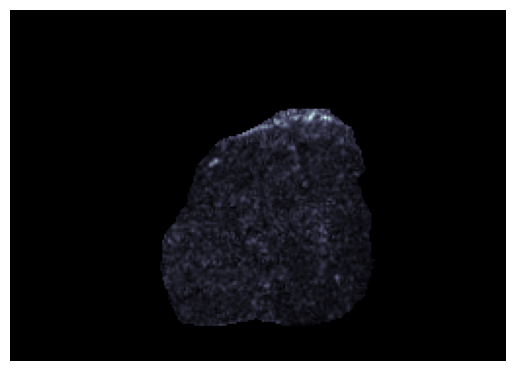

In [9]:
for patient in patient_folders:
    patient_path = os.path.join(path, patient)
    tags = ['mr', 'ct', 'mask']
    
    for tag in tags:
        nii_path = os.path.join(patient_path, tag+".nii.gz")
        nii = nib.load(nii_path)
        nii_data = nii.get_fdata()
        
        number_of_slices = nii_data.shape[0]
        
        print(number_of_slices)
        plt.imshow(ndi.rotate(nii_data[200], 90), cmap='bone')
        plt.axis('off')
        plt.show()

        break
        # for slice_ in range(number_of_slices):
        #     image = ndi.rotate(nii_data[slice_], 90)
        #     # plt.imshow(image, cmap='bone')
        #     # plt.axis('off')
        #     # plt.show()
        #     output_path = f"/home/crimsondawn/602_project/dataset/{tag}/{patient}_{slice_}.jpeg"
        #     # print(image.shape)
        #     img = Image.fromarray(image)
        #     img = img.convert("L")
        #     img.save(output_path)
        #     # plt.savefig(output_path)
        #     # break
        
    break    
    # mri = nib.load(mri_path)
    # ct = nib.load(ct_path)
    # mask = nib.load(ct_path)
    
    # mri_data = mri.get_fdata()

    


In [10]:
path = '/home/crimsondawn/602_project/data/brain/1BC087'
